In [1]:
from high_level_tdc import *
from time import sleep
from matplotlib import pyplot as plt
import numpy as np

In [2]:

enable_calib_pulser()
print(read_scaler(0))
print(scaler_rate(0,delay=0.1))
print(scaler_rate(1,delay=0.1))
print(scaler_rate(2,delay=0.1))

[1272, 7564]
270785.85117518064
270758.29339081276
270768.2448129456


In [11]:
#import spi2b4b
# Open SPI device
#device = spi2b4b.open()

In [22]:
#spi2b4b.write(device,0x14,0x01,0x10)
#spi2b4b.read(device,0x04,0x01)

[0, 0, 0, 0, 0, 16]

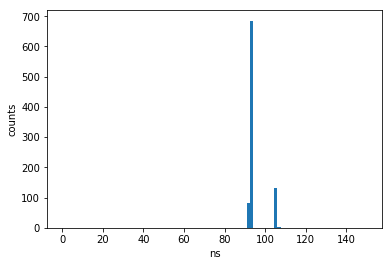

StdDev (ns): 4.713


In [23]:
##################################################
##             read battery pulser              ##
##################################################

disable_calib_pulser()

ch=0

l = 0
r = 150

tot_list = []

for i in range(0,1000):
    arm()
    sleep(0.002) 
    tot_list += [read_tot(ch)]
    
tot_ns = np.array(tot_list)*1e9
mask = (tot_ns >l) & (tot_ns <r)
tot_ns = tot_ns[mask]

plt.hist(tot_ns,bins=np.linspace(l,r,100))
plt.xlabel("ns")
plt.ylabel("counts")
plt.show()

print("StdDev (ns): {:3.3f}".format(np.std(tot_ns)))

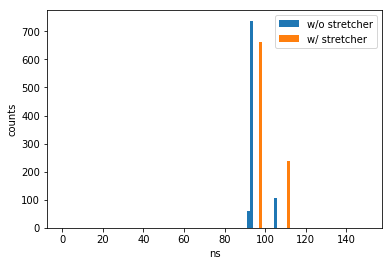

In [3]:
##################################################
##             read battery pulser              ##
##################################################

disable_calib_pulser()

ch=0

l = 0
r = 150

tot_list_a = []
tot_list_b = []

disable_stretcher()

for i in range(0,1000):
    arm()
    sleep(0.002) 
    tot_list_a += [read_tot(ch)]
    
enable_stretcher()

for i in range(0,1000):
    arm()
    sleep(0.002) 
    tot_list_b += [read_tot(ch)]
    
#tot_ns = np.array(tot_list)*1e9
#mask = (tot_ns >l) & (tot_ns <r)
#tot_ns = tot_ns[mask]

tot_ns_a = np.array(tot_list_a)*1e9
tot_ns_b = np.array(tot_list_b)*1e9

plt.hist(tot_ns_a,bins=np.linspace(l,r,100),label="w/o stretcher")
plt.hist(tot_ns_b,bins=np.linspace(l,r,100),label="w/ stretcher")
plt.xlabel("ns")
plt.ylabel("counts")
plt.legend()
plt.show()

#print("StdDev (ns): {:3.3f}".format(np.std(tot_ns)))



<IPython.core.display.Javascript object>


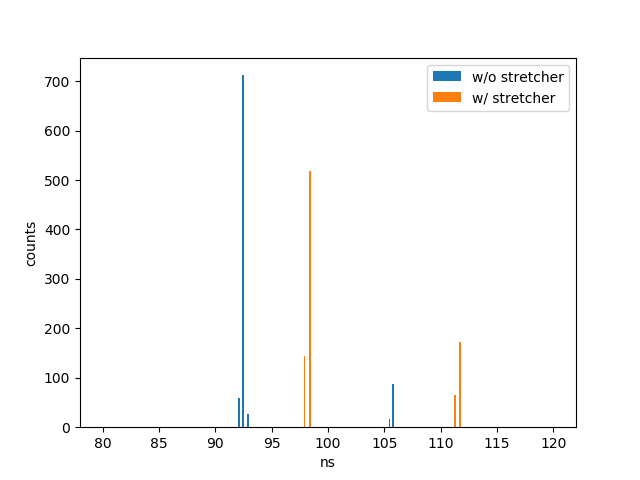

In [6]:
%matplotlib notebook

l=80
r=120
bins=250
plt.hist(tot_ns_a,bins=np.linspace(l,r,bins),label="w/o stretcher")
plt.hist(tot_ns_b,bins=np.linspace(l,r,bins),label="w/ stretcher")
plt.xlabel("ns")
plt.ylabel("counts")
plt.legend()
plt.show()

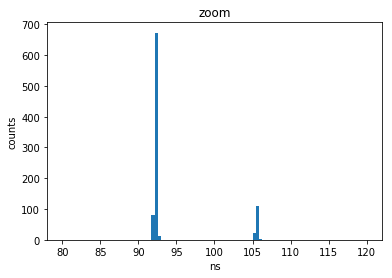

StdDev (ns): 4.713


In [24]:
##                 zoom in                      ##



l = 80
r = 120
    
tot_ns = np.array(tot_list)*1e9
mask = (tot_ns >l) & (tot_ns <r)
tot_ns = tot_ns[mask]

plt.hist(tot_ns,bins=np.linspace(l,r,100))
plt.xlabel("ns")
plt.ylabel("counts")
plt.title("zoom")
plt.show()

print("StdDev (ns): {:3.3f}".format(np.std(tot_ns)))

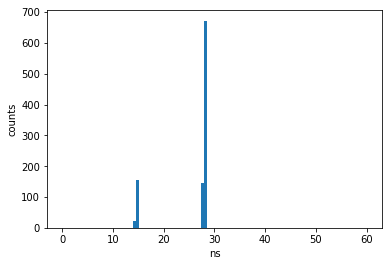

StdDev (ns): 5.086


In [5]:
##################################################
##             read calib pulser                ##
##################################################

enable_calib_pulser()

ch = 2

tot_list = []

for i in range(0,1000):
    arm()
    sleep(0.001) 
    tot_list += [read_tot(ch)]
    
tot_ns = np.array(tot_list)*1e9
mask = (tot_ns >0) & (tot_ns <60)
tot_ns = tot_ns[mask]

plt.hist(tot_ns,bins=np.linspace(0,60,100))
plt.xlabel("ns")
plt.ylabel("counts")
plt.show()

print("StdDev (ns): {:3.3f}".format(np.std(tot_ns)))

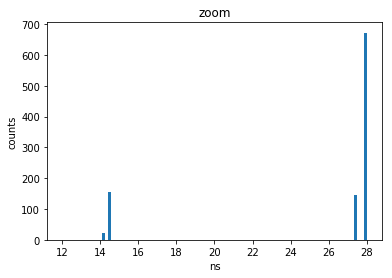

StdDev (ns): 5.086


In [26]:
##                 zoom in                      ##



l = 12
r = 28
    
tot_ns = np.array(tot_list)*1e9
mask = (tot_ns >l) & (tot_ns <r)
tot_ns = tot_ns[mask]

plt.hist(tot_ns,bins=np.linspace(l,r,100))
plt.xlabel("ns")
plt.ylabel("counts")
plt.title("zoom")
plt.show()


print("StdDev (ns): {:3.3f}".format(np.std(tot_ns)))

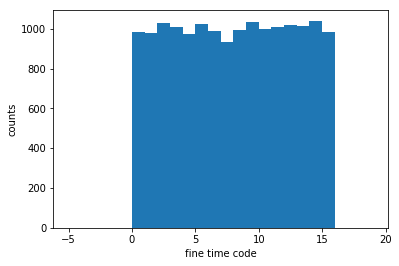

In [7]:
##################################################
##                 box diagrams                 ##
##################################################


enable_calib_pulser()

ch = 5

ft_list = []

for i in range(0,16000):
    arm()
    sleep(0.001) 
    ft_list += [read_fine_cnt(ch)]
    

plt.hist(np.array(ft_list),bins=range(-5,20))
plt.xlabel("fine time code")
plt.ylabel("counts")
plt.show()


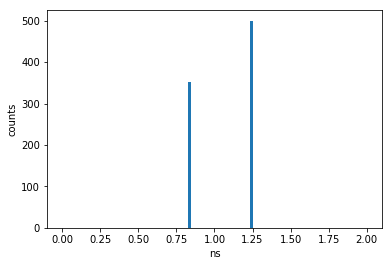

StdDev (ns): 0.205


In [22]:
##################################################
##             read calib pulser                ##
##################################################

enable_calib_pulser()

ch = 2

tdiff_list = []

for i in range(0,1000):
    arm()
    sleep(0.001) 
    tdiff_list += [read_tdc_chan(8)-read_tdc_chan(6)]
    
tdiff_ns = np.array(tdiff_list)*1e9
mask = (tdiff_ns >0) & (tdiff_ns <60)
tdiff_ns = tdiff_ns[mask]

plt.hist(tdiff_ns,bins=np.linspace(0,2,100))
plt.xlabel("ns")
plt.ylabel("counts")
plt.show()

print("StdDev (ns): {:3.3f}".format(np.std(tdiff_ns)))